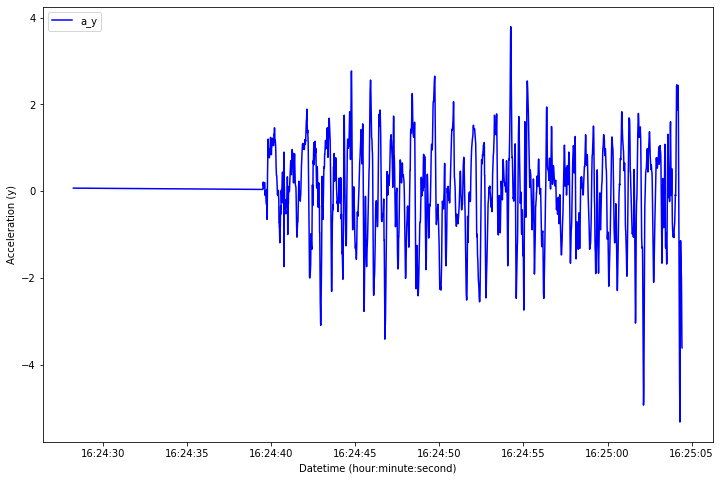

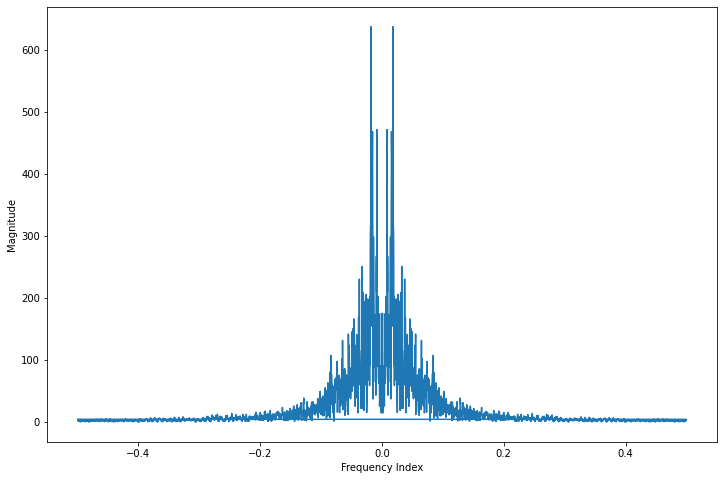

212.55155343163196


/home/vagrant/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


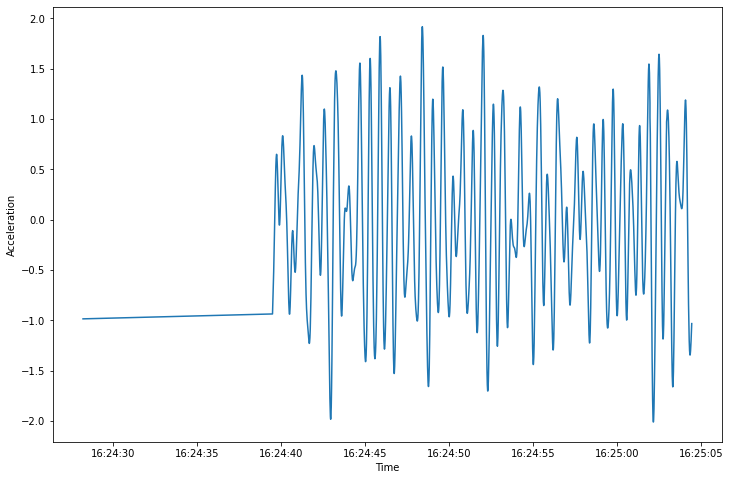

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

path = "./data/tristan.csv"

# setup
data = pd.read_csv(path, parse_dates=['time'])
data["a_total"] = data.apply(lambda row: get_acceleration_from_3d(row["ax"], row["ay"], row["az"]), axis=1)

# plot raw data
x, y = data["time"], data["ay"]

plt.figure(figsize=(12, 8))
plt.plot(x, y, color="blue", label="a_y")
plt.legend(loc="upper left")
plt.xlabel("Datetime (hour:minute:second)")
plt.ylabel("Acceleration (y)")
plt.savefig("datetime_accel.png")
plt.show()

# plot FFT
yf = np.fft.fft(y)
xf = np.fft.fftfreq(y.size)

plt.figure(figsize=(12, 8))
plt.plot(xf, np.abs(yf))
plt.xlabel("Frequency Index")
plt.ylabel("Magnitude")
plt.show()

# plot clean data
x, y = get_clean_data(data)

plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.show()